In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
car_data = pd.read_csv('C:\Py\car_data.csv')

In [5]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_data.shape

(301, 9)

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


- checking missing values for each columns in the dataset

In [9]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
# checking the distribution of catagorical data
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


- Encoding catagorical columns

In [12]:
car_data.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

car_data.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace=True)

car_data.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace=True)

In [13]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


- segregate data into independent & dependent variables

In [14]:
x = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

- splitting the data into train & test data

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

- fit & train the model

In [19]:
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression()

- Model Evaluation

In [20]:
# Prediction on training data
train_data = reg_model.predict(x_train)
error_score = metrics.r2_score(y_train, train_data)

In [21]:
error_score

0.8843647367786596

- Visualize the data

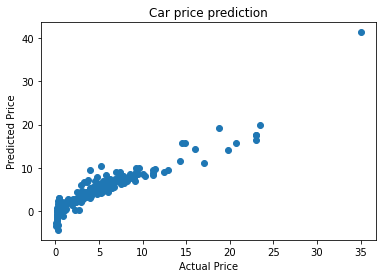

In [23]:
plt.scatter(y_train, train_data)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Car price prediction')
plt.show()

In [24]:
# Prediction on test data
test_data = reg_model.predict(x_test)
error_score = metrics.r2_score(y_test, test_data)

In [25]:
error_score

0.843493217388849

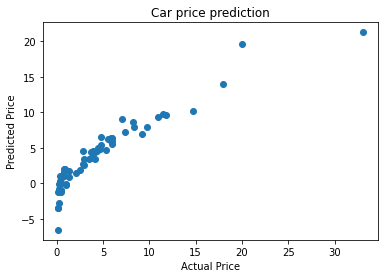

In [26]:
plt.scatter(y_test, test_data)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Car price prediction')
plt.show()

- Training the data using Lasso Regression

In [30]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

In [31]:
# Prediction on training data
train_data = lasso_model.predict(x_train)
metrics.r2_score(y_train, train_data)

0.8424684224488146

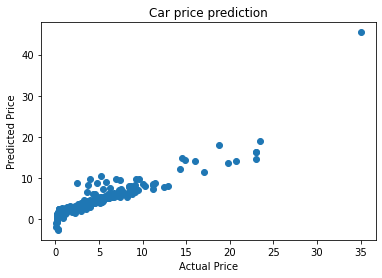

In [32]:
plt.scatter(y_train, train_data)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Car price prediction')
plt.show()

In [34]:
# Prediction on test data
test_data = lasso_model.predict(x_test)
metrics.r2_score(y_test, test_data)

0.8020492662138775

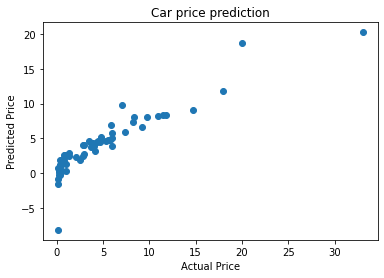

In [35]:
plt.scatter(y_test, test_data)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Car price prediction')
plt.show()